# Problem Statement: 
A Microfinance Institution (MFI) is an organization that offers financial services to low income populations. MFS becomes very useful when targeting especially the unbanked poor families living in remote areas with not much sources of income. The Microfinance services (MFS) provided by MFI are Group Loans, Agricultural Loans, Individual Business Loans and so on. 
Many microfinance institutions (MFI), experts and donors are supporting the idea of using mobile financial services (MFS) which they feel are more convenient and efficient, and cost saving, than the traditional high-touch model used since long for the purpose of delivering microfinance services. Though, the MFI industry is primarily focusing on low income families and are very useful in such areas, the implementation of MFS has been uneven with both significant challenges and successes.
Today, microfinance is widely accepted as a poverty-reduction tool, representing $70 billion in outstanding loans and a global outreach of 200 million clients.
We are working with one such client that is in Telecom Industry. They are a fixed wireless telecommunications network provider. They have launched various products and have developed its business and organization based on the budget operator model, offering better products at Lower Prices to all value conscious customers through a strategy of disruptive innovation that focuses on the subscriber. 
They understand the importance of communication and how it affects a person’s life, thus, focusing on providing their services and products to low income families and poor customers that can help them in the need of hour. 
They are collaborating with an MFI to provide micro-credit on mobile balances to be paid back in 5 days. The Consumer is believed to be defaulter if he deviates from the path of paying back the loaned amount within the time duration of 5 days. For the loan amount of 5 (in Indonesian Rupiah), payback amount should be 6 (in Indonesian Rupiah), while, for the loan amount of 10 (in Indonesian Rupiah), the payback amount should be 12 (in Indonesian Rupiah). 
The sample data is provided to us from our client database. It is hereby given to you for this exercise. In order to improve the selection of customers for the credit, the client wants some predictions that could help them in further investment and improvement in selection of customers.

# Exercise:
Build a model which can be used to predict in terms of a probability for each loan transaction, whether the customer will be paying back the loaned amount within 5 days of insurance of loan. In this case, Label ‘1’ indicates that the loan has been payed i.e. Non- defaulter, while, Label ‘0’ indicates that the loan has not been payed i.e. defaulter.  


In [16]:
#importing Required Libraries for EDA
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pandas_profiling import ProfileReport
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [17]:
#Reading Dataset
df = pd.read_csv(r"C:\Users\TAUFIQ\Desktop\Data file.csv")

In [18]:
#Printing first 5 rows of my dataset
df.head()

,Unnamed: 0,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
0,1,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,...,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,UPW,2016-07-20
1,2,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,...,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,UPW,2016-08-10
2,3,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,...,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,2016-08-19
3,4,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,...,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,UPW,2016-06-06
4,5,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,...,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,UPW,2016-06-22


In [19]:
#Printing column names of my dataset
df.columns

Index(['Unnamed: 0', 'label', 'msisdn', 'aon', 'daily_decr30', 'daily_decr90',
       'rental30', 'rental90', 'last_rech_date_ma', 'last_rech_date_da',
       'last_rech_amt_ma', 'cnt_ma_rech30', 'fr_ma_rech30',
       'sumamnt_ma_rech30', 'medianamnt_ma_rech30', 'medianmarechprebal30',
       'cnt_ma_rech90', 'fr_ma_rech90', 'sumamnt_ma_rech90',
       'medianamnt_ma_rech90', 'medianmarechprebal90', 'cnt_da_rech30',
       'fr_da_rech30', 'cnt_da_rech90', 'fr_da_rech90', 'cnt_loans30',
       'amnt_loans30', 'maxamnt_loans30', 'medianamnt_loans30', 'cnt_loans90',
       'amnt_loans90', 'maxamnt_loans90', 'medianamnt_loans90', 'payback30',
       'payback90', 'pcircle', 'pdate'],
      dtype='object')

In [20]:
#Dropping the below unrelated columns
df.drop("Unnamed: 0",axis=1,inplace=True)
df.drop("pcircle",axis=1,inplace=True)

In [21]:
#hape of my dataset after drop
df.shape

(209593, 35)

In [22]:
#Dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209593 entries, 0 to 209592
Data columns (total 35 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   label                 209593 non-null  int64  
 1   msisdn                209593 non-null  object 
 2   aon                   209593 non-null  float64
 3   daily_decr30          209593 non-null  float64
 4   daily_decr90          209593 non-null  float64
 5   rental30              209593 non-null  float64
 6   rental90              209593 non-null  float64
 7   last_rech_date_ma     209593 non-null  float64
 8   last_rech_date_da     209593 non-null  float64
 9   last_rech_amt_ma      209593 non-null  int64  
 10  cnt_ma_rech30         209593 non-null  int64  
 11  fr_ma_rech30          209593 non-null  float64
 12  sumamnt_ma_rech30     209593 non-null  float64
 13  medianamnt_ma_rech30  209593 non-null  float64
 14  medianmarechprebal30  209593 non-null  float64
 15  

In [23]:
#Statistical view of my dataset
df.describe()

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,...,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90
count,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,...,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000
mean,0.875177,8112.343445,5381.402289,6082.515068,2692.581910,3483.406534,3755.847800,3712.202921,2064.452797,3.978057,...,2.758981,17.952021,274.658747,0.054029,18.520919,23.645398,6.703134,0.046077,3.398826,4.321485
std,0.330519,75696.082531,9220.623400,10918.812767,4308.586781,5770.461279,53905.892230,53374.833430,2370.786034,4.256090,...,2.554502,17.379741,4245.264648,0.218039,224.797423,26.469861,2.103864,0.200692,8.813729,10.308108
min,0.000000,-48.000000,-93.012667,-93.012667,-23737.140000,-24720.580000,-29.000000,-29.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,246.000000,42.440000,42.692000,280.420000,300.260000,1.000000,0.000000,770.000000,1.000000,...,1.000000,6.000000,6.000000,0.000000,1.000000,6.000000,6.000000,0.000000,0.000000,0.000000
50%,1.000000,527.000000,1469.175667,1500.000000,1083.570000,1334.000000,3.000000,0.000000,1539.000000,3.000000,...,2.000000,12.000000,6.000000,0.000000,2.000000,12.000000,6.000000,0.000000,0.000000,1.666667
75%,1.000000,982.000000,7244.000000,7802.790000,3356.940000,4201.790000,7.000000,0.000000,2309.000000,5.000000,...,4.000000,24.000000,6.000000,0.000000,5.000000,30.000000,6.000000,0.000000,3.750000,4.500000
max,1.000000,999860.755168,265926.000000,320630.000000,198926.110000,200148.110000,998650.377733,999171.809410,55000.000000,203.000000,...,50.000000,306.000000,99864.560864,3.000000,4997.517944,438.000000,12.000000,3.000000,171.500000,171.500000


# Inferences
•	There are no null values in the dataset. 

•	There are huge number of outliers which needs to be treated.

•	The data looks Skew for some columns which needs to be treated as well.

•	My Labeled data looks imbalanced(as shown below) which also needs to be treated.

<AxesSubplot:xlabel='label', ylabel='count'>

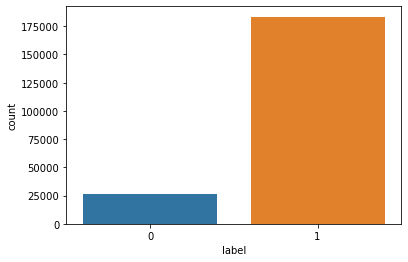

In [24]:
#countplot for my label and see i have imbalance data which will be used later on for upsampling
sns.countplot(df["label"])

In [25]:
#Counting Label
df["label"].value_counts()

1    183431
0     26162
Name: label, dtype: int64

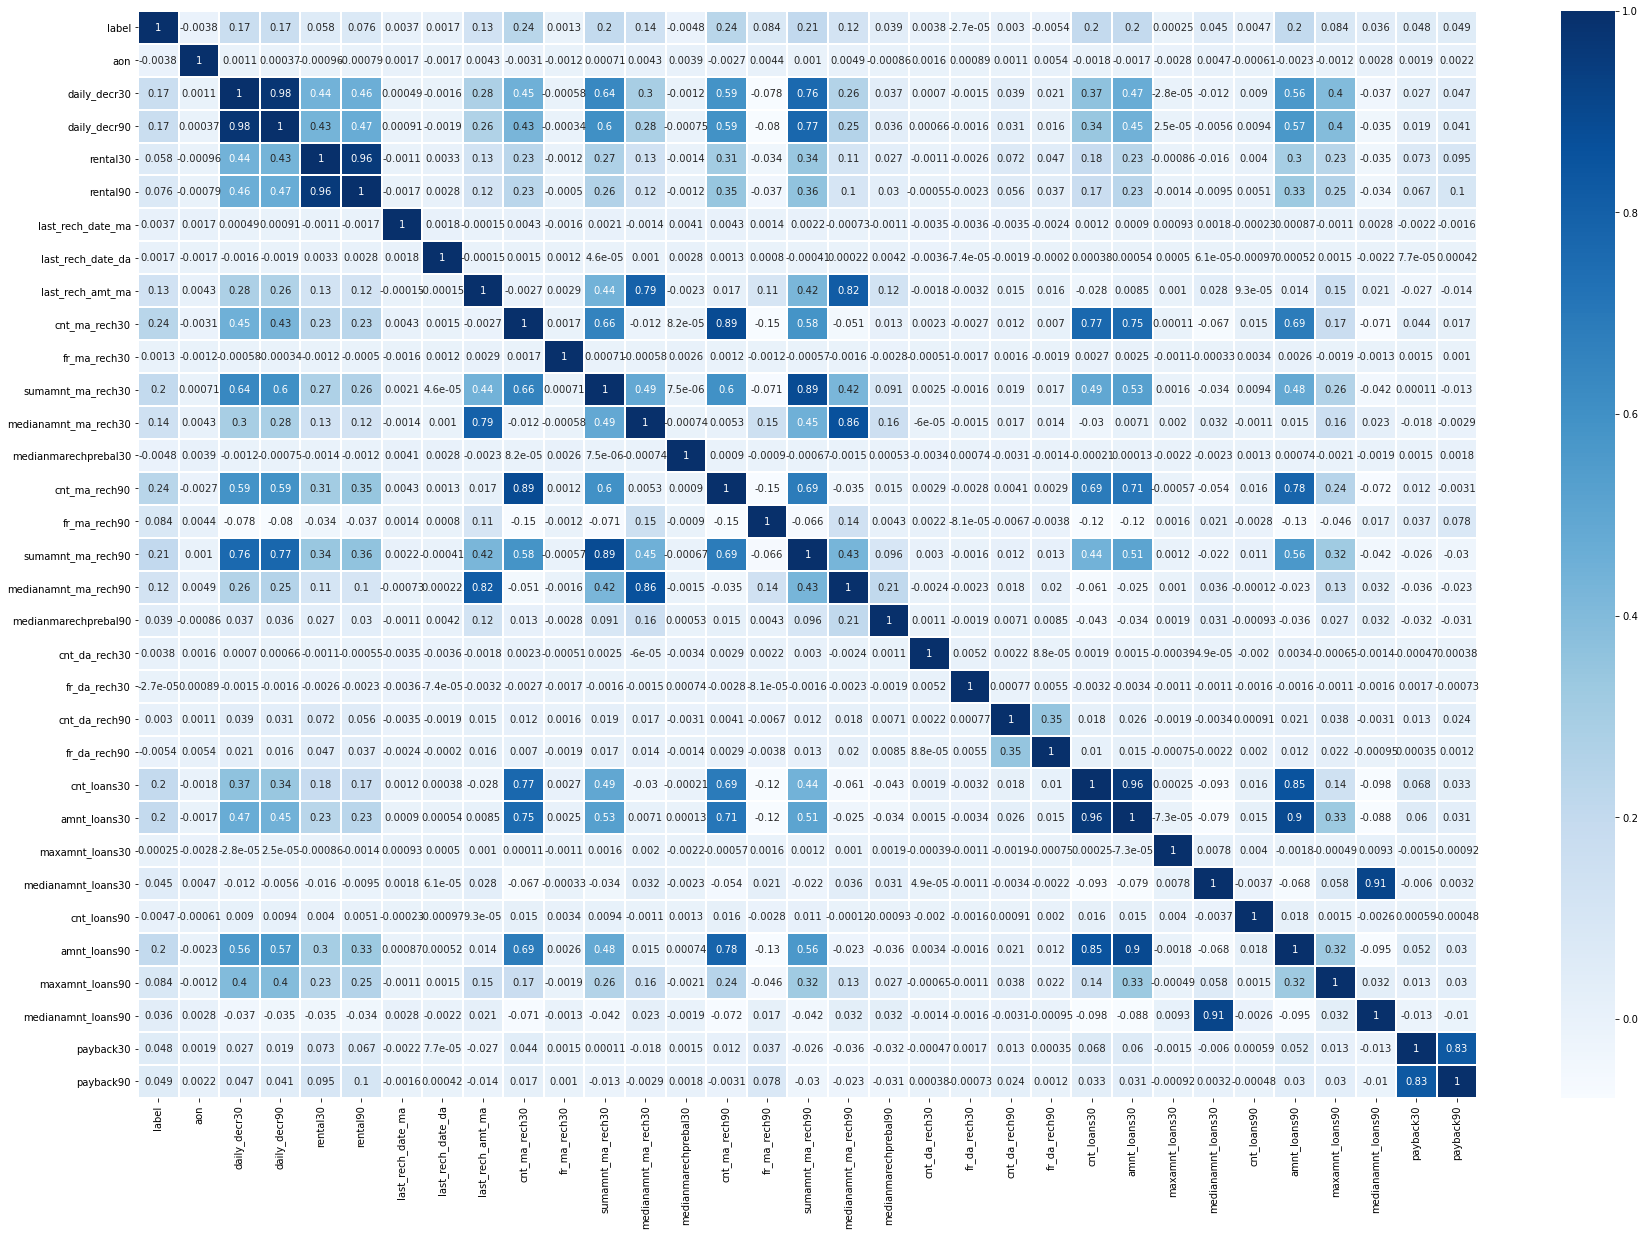

In [26]:
#Checking for strong correlation between features and label
plt.figure(figsize=(30,20))
sns.heatmap(df.corr(), annot=True, cmap='Blues', linewidths=1, robust=True)
plt.show()

In [27]:
#Dropping all my duplicates value
df.drop_duplicates(inplace=True)

In [28]:
#Shape of my dataset after drop
df.shape

(209592, 35)

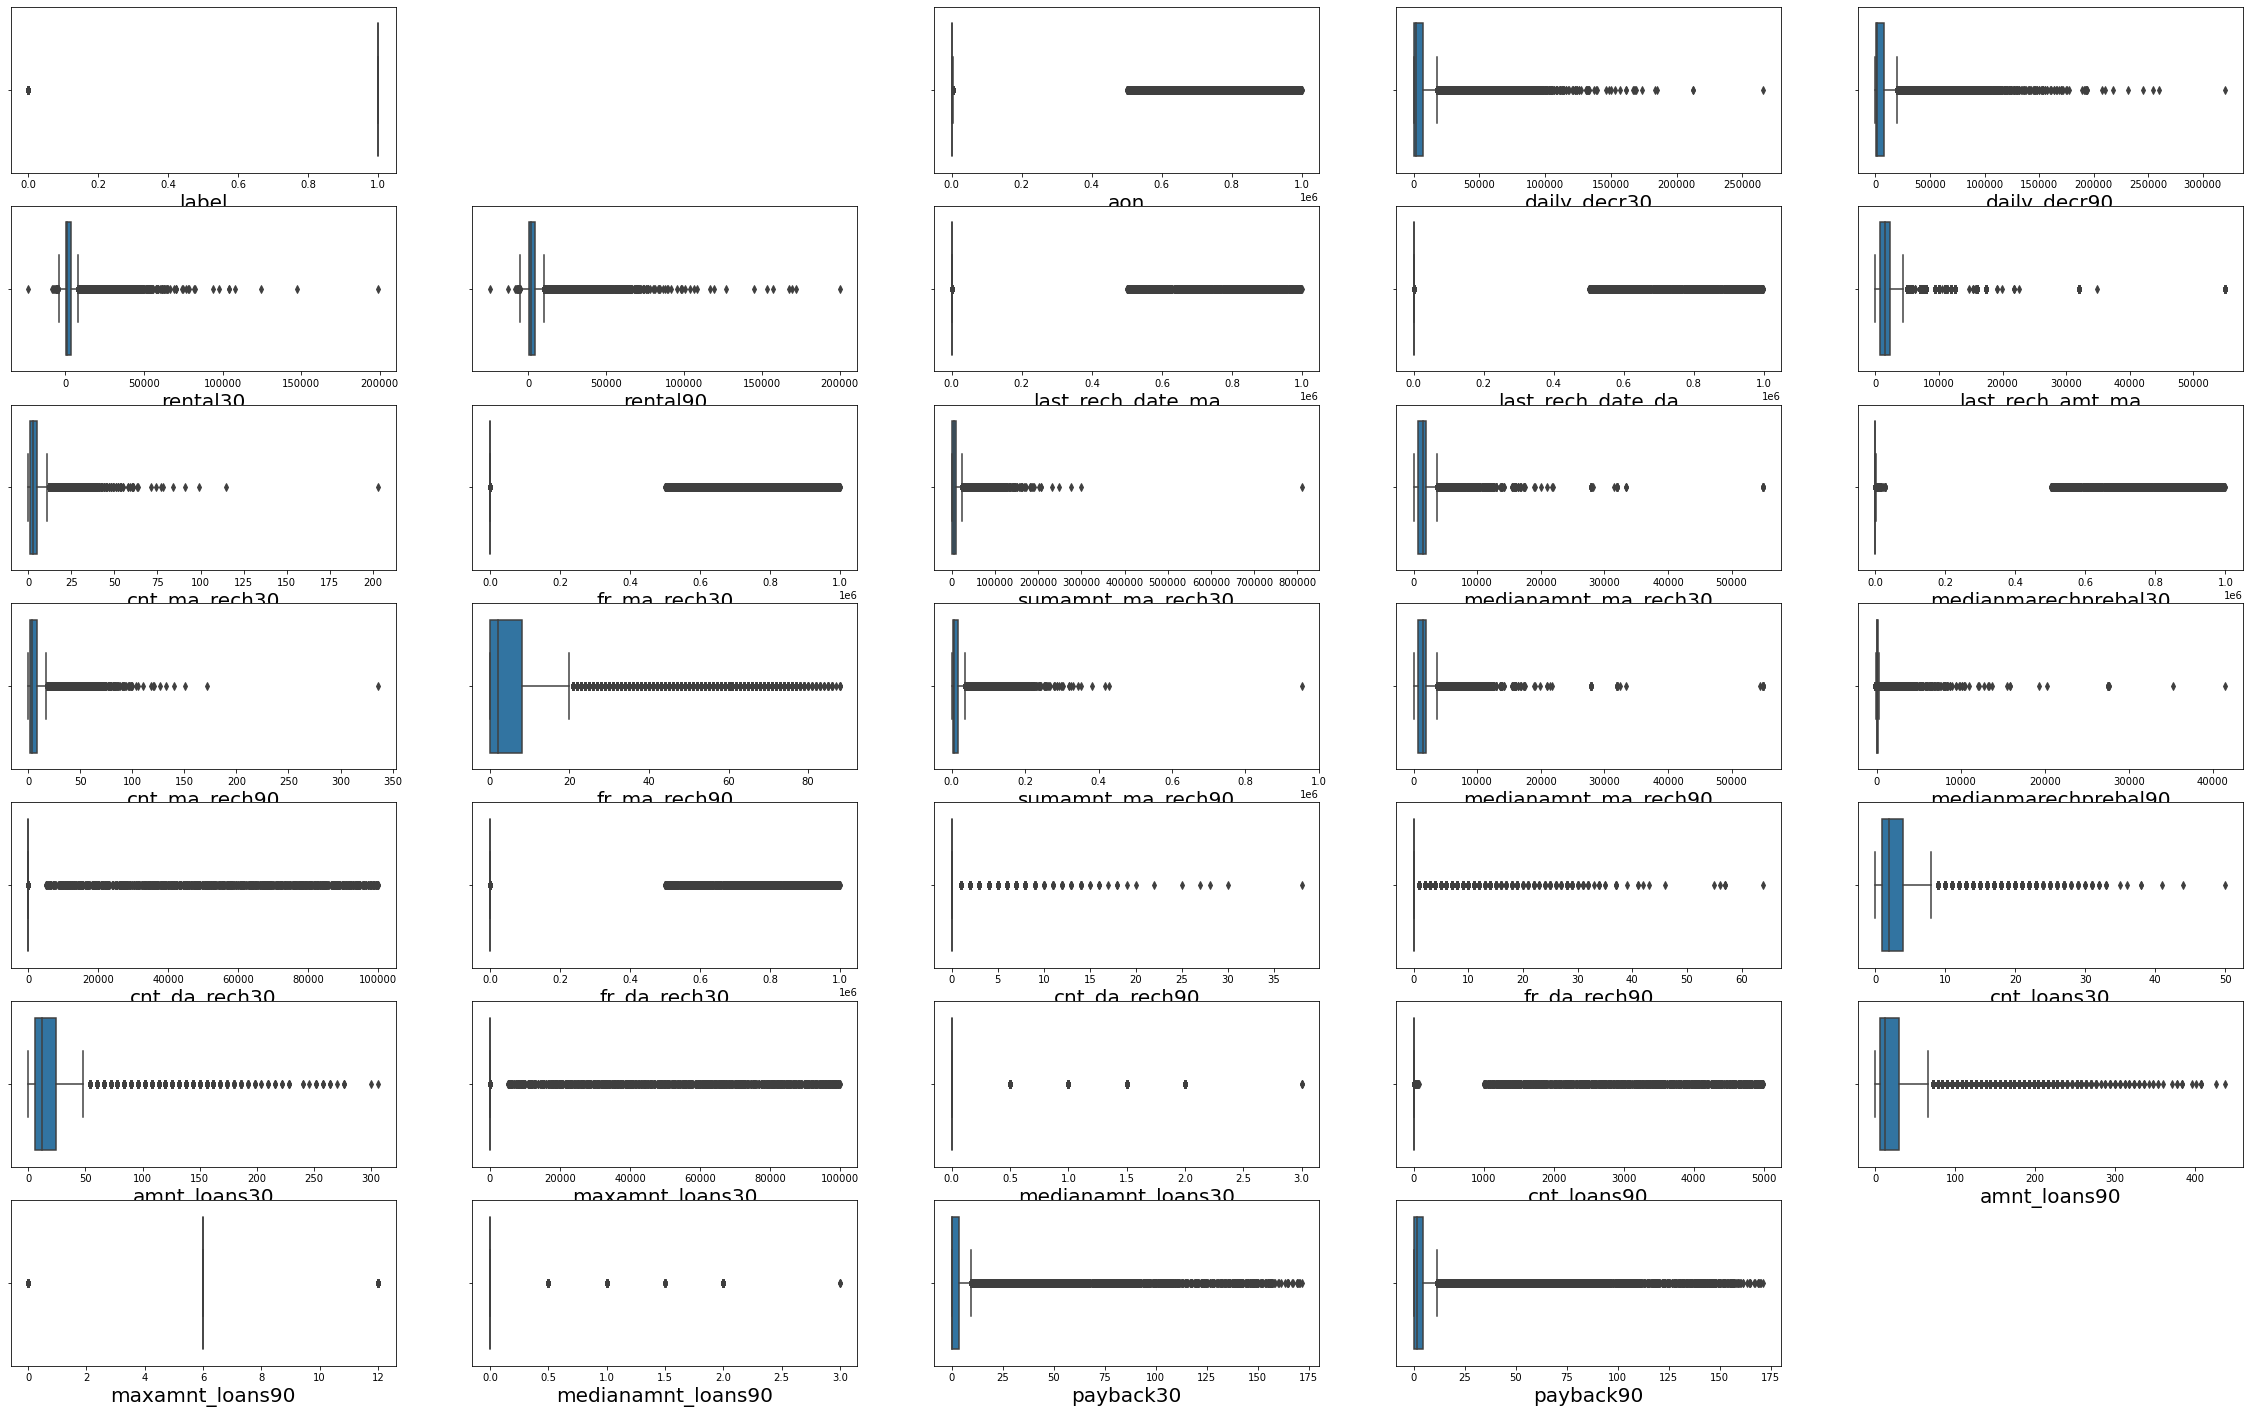

In [29]:
#plotting box plot for my dataframe to check and remove outliers
plt.figure(figsize=(40,25),facecolor="white")
plotnumber = 1

for column in df:
    
    if(df[column].dtype == np.float64 or df[column].dtype == np.int64):
        if plotnumber<=35:
            ax = plt.subplot(7,5,plotnumber)
            sns.boxplot(df[column])
            plt.xlabel(column,fontsize=20)
       
    plotnumber +=1
plt.show()

In [30]:
#encoding for my categorical variables so that it will covert to numeric
from sklearn.preprocessing import LabelEncoder
for column in df.columns:
    if df[column].dtype == np.number:
        continue
    df[column] = LabelEncoder().fit_transform(df[column])

In [31]:
#checking for Z score to remove outliers
from scipy import stats

z = np.abs(stats.zscore(df))

print(z)

index = (np.where(z>3)[0])

df = df.drop(df.index[index])

df.shape

[[2.64788862 0.98420826 0.1035771  ... 2.90485222 2.39418491 0.52240239]
 [0.37765939 0.91503349 0.09776438 ... 0.38562571 0.41922778 1.477399  ]
 [0.37765939 1.1069242  0.10010268 ... 0.38562571 0.41922778 1.88668326]
 ...
 [0.37765939 0.72742929 0.09378795 ... 0.06823331 0.04733989 0.93168665]
 [0.37765939 0.34018268 0.08428944 ... 0.38562571 0.59942165 0.74978253]
 [0.37765939 0.52387526 0.08628426 ... 0.38562571 0.41922778 0.06878599]]


(162025, 35)

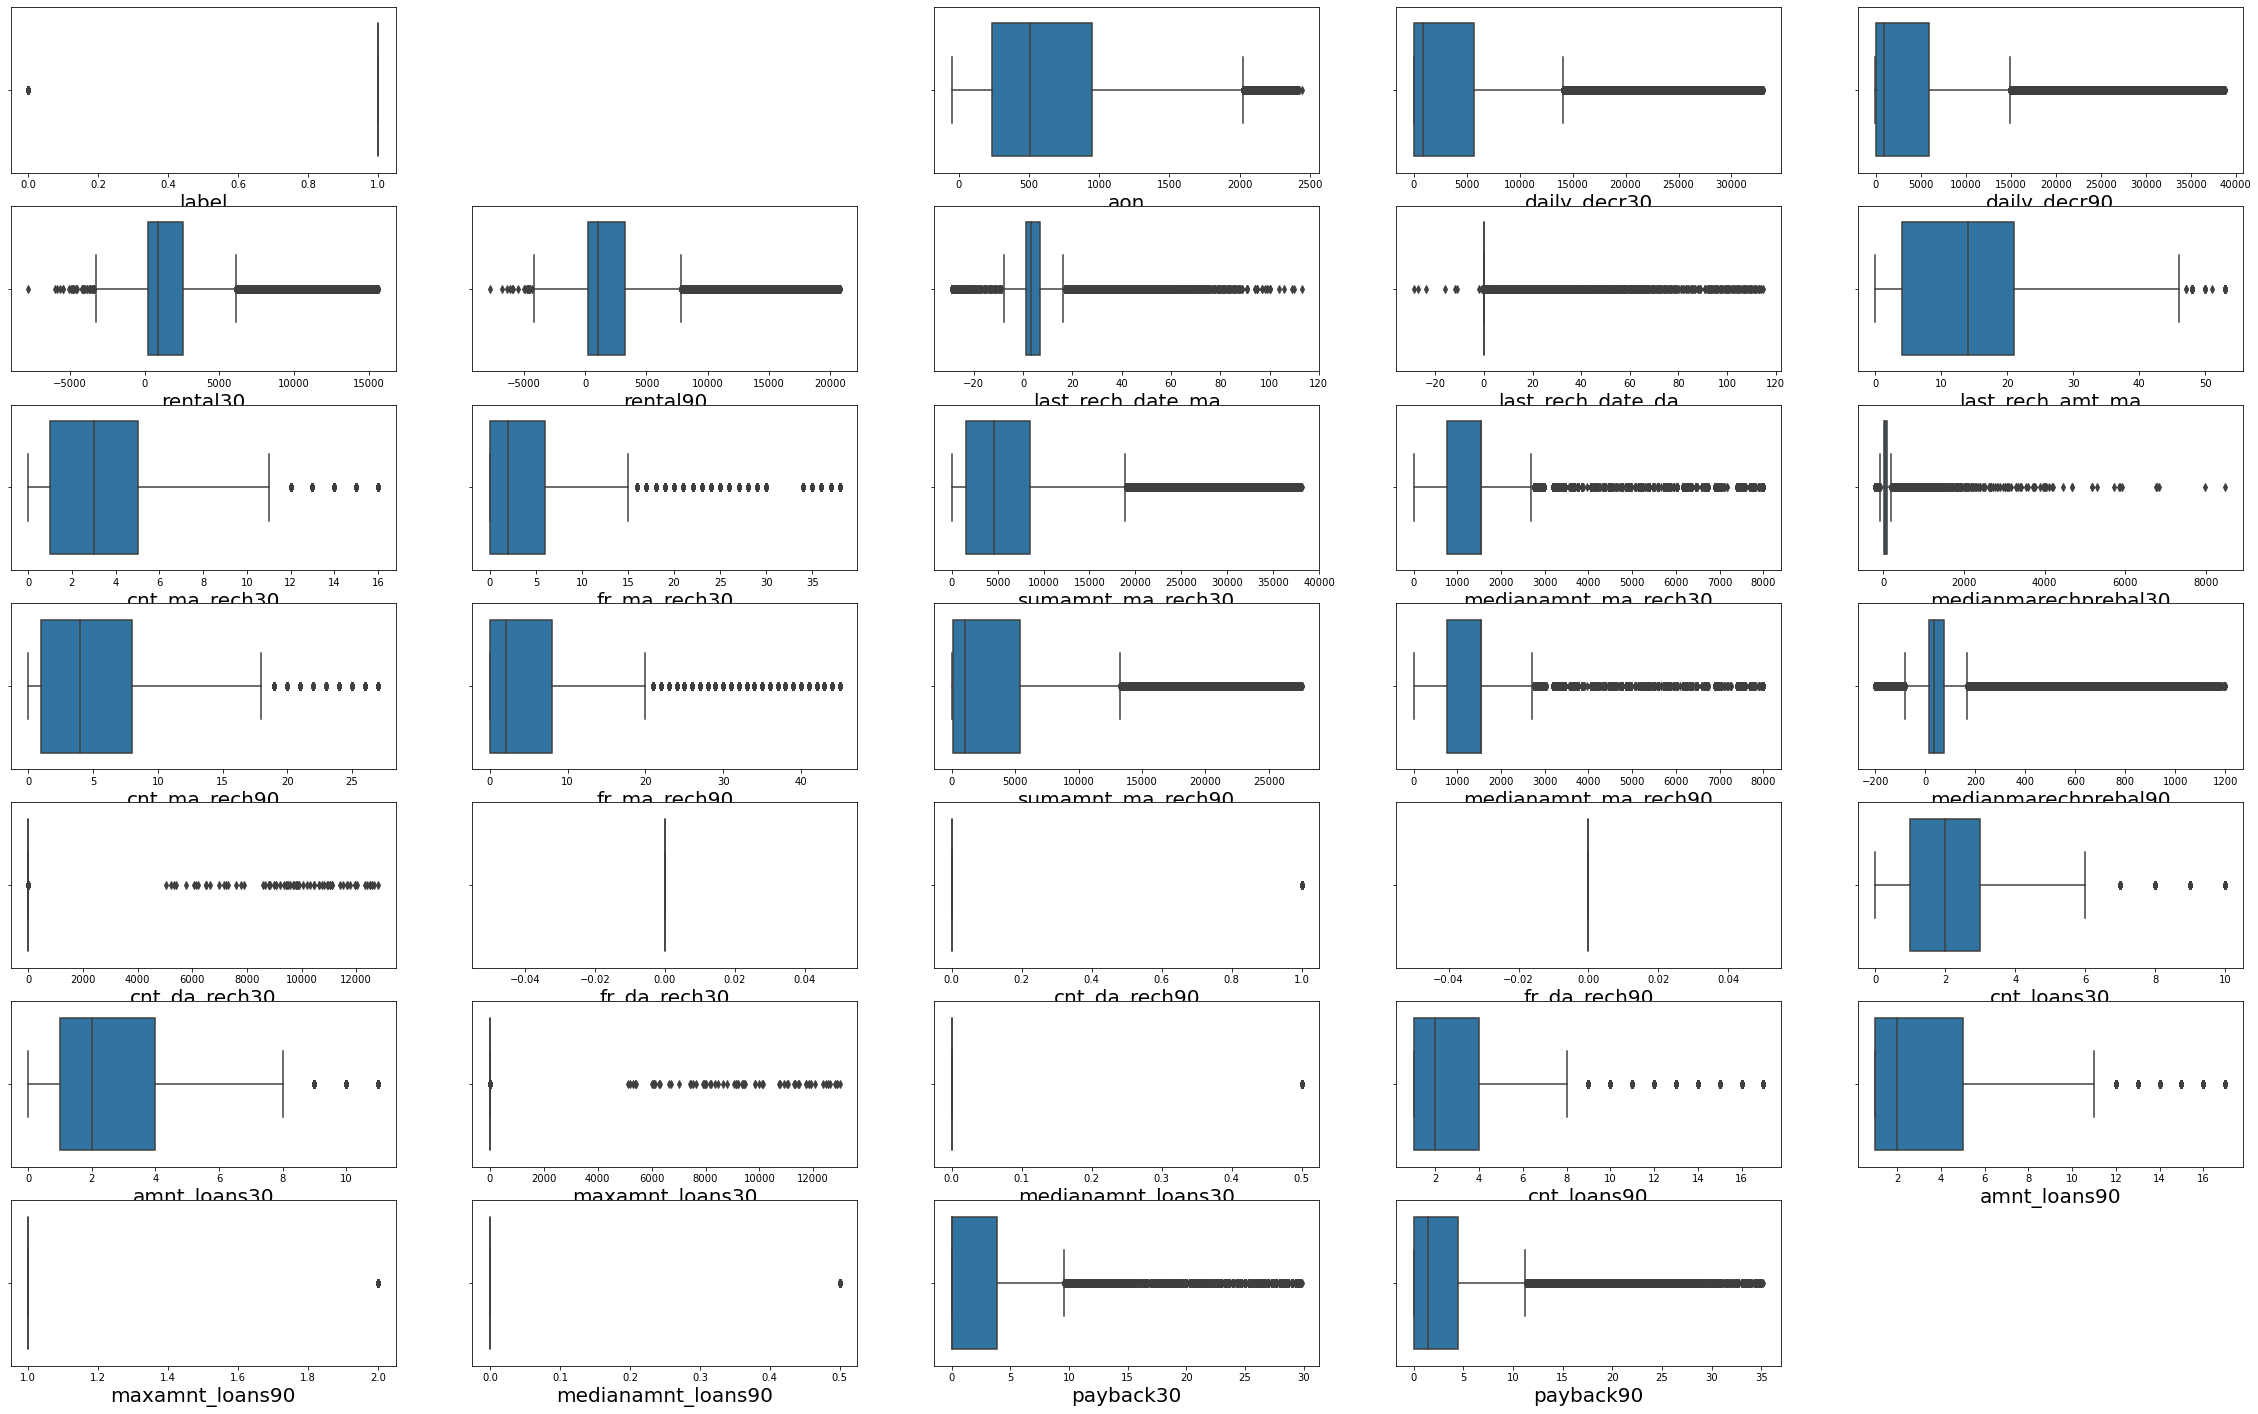

In [32]:
#plotting box plot for my dataframe after z score
plt.figure(figsize=(40,25),facecolor="white")
plotnumber = 1

for column in df:
    
    if(df[column].dtype == np.float64 or df[column].dtype == np.int64):
        if plotnumber<=35:
            ax = plt.subplot(7,5,plotnumber)
            sns.boxplot(df[column])
            plt.xlabel(column,fontsize=20)
       
    plotnumber +=1
plt.show()

In [33]:
#skew check
df.skew()

label                   -2.092984
msisdn                   0.000036
aon                      0.957497
daily_decr30             1.959085
daily_decr90             2.068789
rental30                 2.193664
rental90                 2.243434
last_rech_date_ma        3.090651
last_rech_date_da       10.380532
last_rech_amt_ma         1.066864
cnt_ma_rech30            1.176478
fr_ma_rech30             2.002628
sumamnt_ma_rech30        1.622336
medianamnt_ma_rech30     2.305971
medianmarechprebal30    10.523246
cnt_ma_rech90            1.322104
fr_ma_rech90             1.981724
sumamnt_ma_rech90        1.876229
medianamnt_ma_rech90     2.354552
medianmarechprebal90     3.693567
cnt_da_rech30           50.849038
fr_da_rech30             0.000000
cnt_da_rech90            6.926194
fr_da_rech90             0.000000
cnt_loans30              1.466506
amnt_loans30             1.441905
maxamnt_loans30         53.563270
medianamnt_loans30       5.355247
cnt_loans90              1.710365
amnt_loans90  

In [34]:
#Skewness removal
for index in df.skew().index:
    if df.skew().loc[index]>0.5:
        df[index]=np.cbrt(df[index])
    if df.skew().loc[index]<-0.5:
        df[index]=np.cbrt(df[index])

In [35]:
df.describe()

,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,...,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pdate
count,162025.000000,162025.000000,162025.000000,162025.000000,162025.000000,162025.000000,162025.000000,162025.000000,162025.000000,162025.000000,...,162025.000000,162025.000000,162025.000000,162025.000000,162025.000000,162025.000000,162025.000000,162025.000000,162025.000000,162025.000000
mean,0.861491,93052.169671,1.962106,10.816179,11.057855,9.904050,10.588209,1.017965,0.065572,1.167849,...,1.305179,1.861228,0.025081,1.373360,1.392237,1.025858,0.019756,0.788137,0.894970,35.083796
std,0.345435,53795.745768,0.358400,8.322430,8.650996,5.921237,6.466617,0.441026,0.465961,0.436111,...,0.328801,0.432895,0.138845,0.379214,0.388199,0.077798,0.123654,0.879070,0.915634,21.666960
min,0.000000,0.000000,-1.537463,-3.469255,-3.469255,-19.820689,-19.820689,-1.453746,-3.072317,0.000000,...,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,46345.000000,1.836809,3.214292,3.218470,6.149926,6.346626,1.000000,0.000000,1.166529,...,1.000000,1.817121,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,17.000000
50%,1.000000,93075.000000,1.999566,9.566842,9.640569,9.618101,10.233187,1.129831,0.000000,1.340749,...,1.259921,1.817121,0.000000,1.259921,1.259921,1.000000,0.000000,0.000000,1.144714,34.000000
75%,1.000000,139646.000000,2.142441,17.794161,18.138884,13.740386,14.852404,1.241366,0.000000,1.402534,...,1.587401,1.817121,0.000000,1.587401,1.709976,1.000000,0.000000,1.565040,1.650964,51.000000
max,1.000000,186242.000000,2.378903,32.080850,33.863524,24.996005,27.498975,1.690907,4.862944,1.554484,...,2.223980,23.504069,0.793701,2.571282,2.571282,1.259921,0.793701,3.101468,3.277285,81.000000


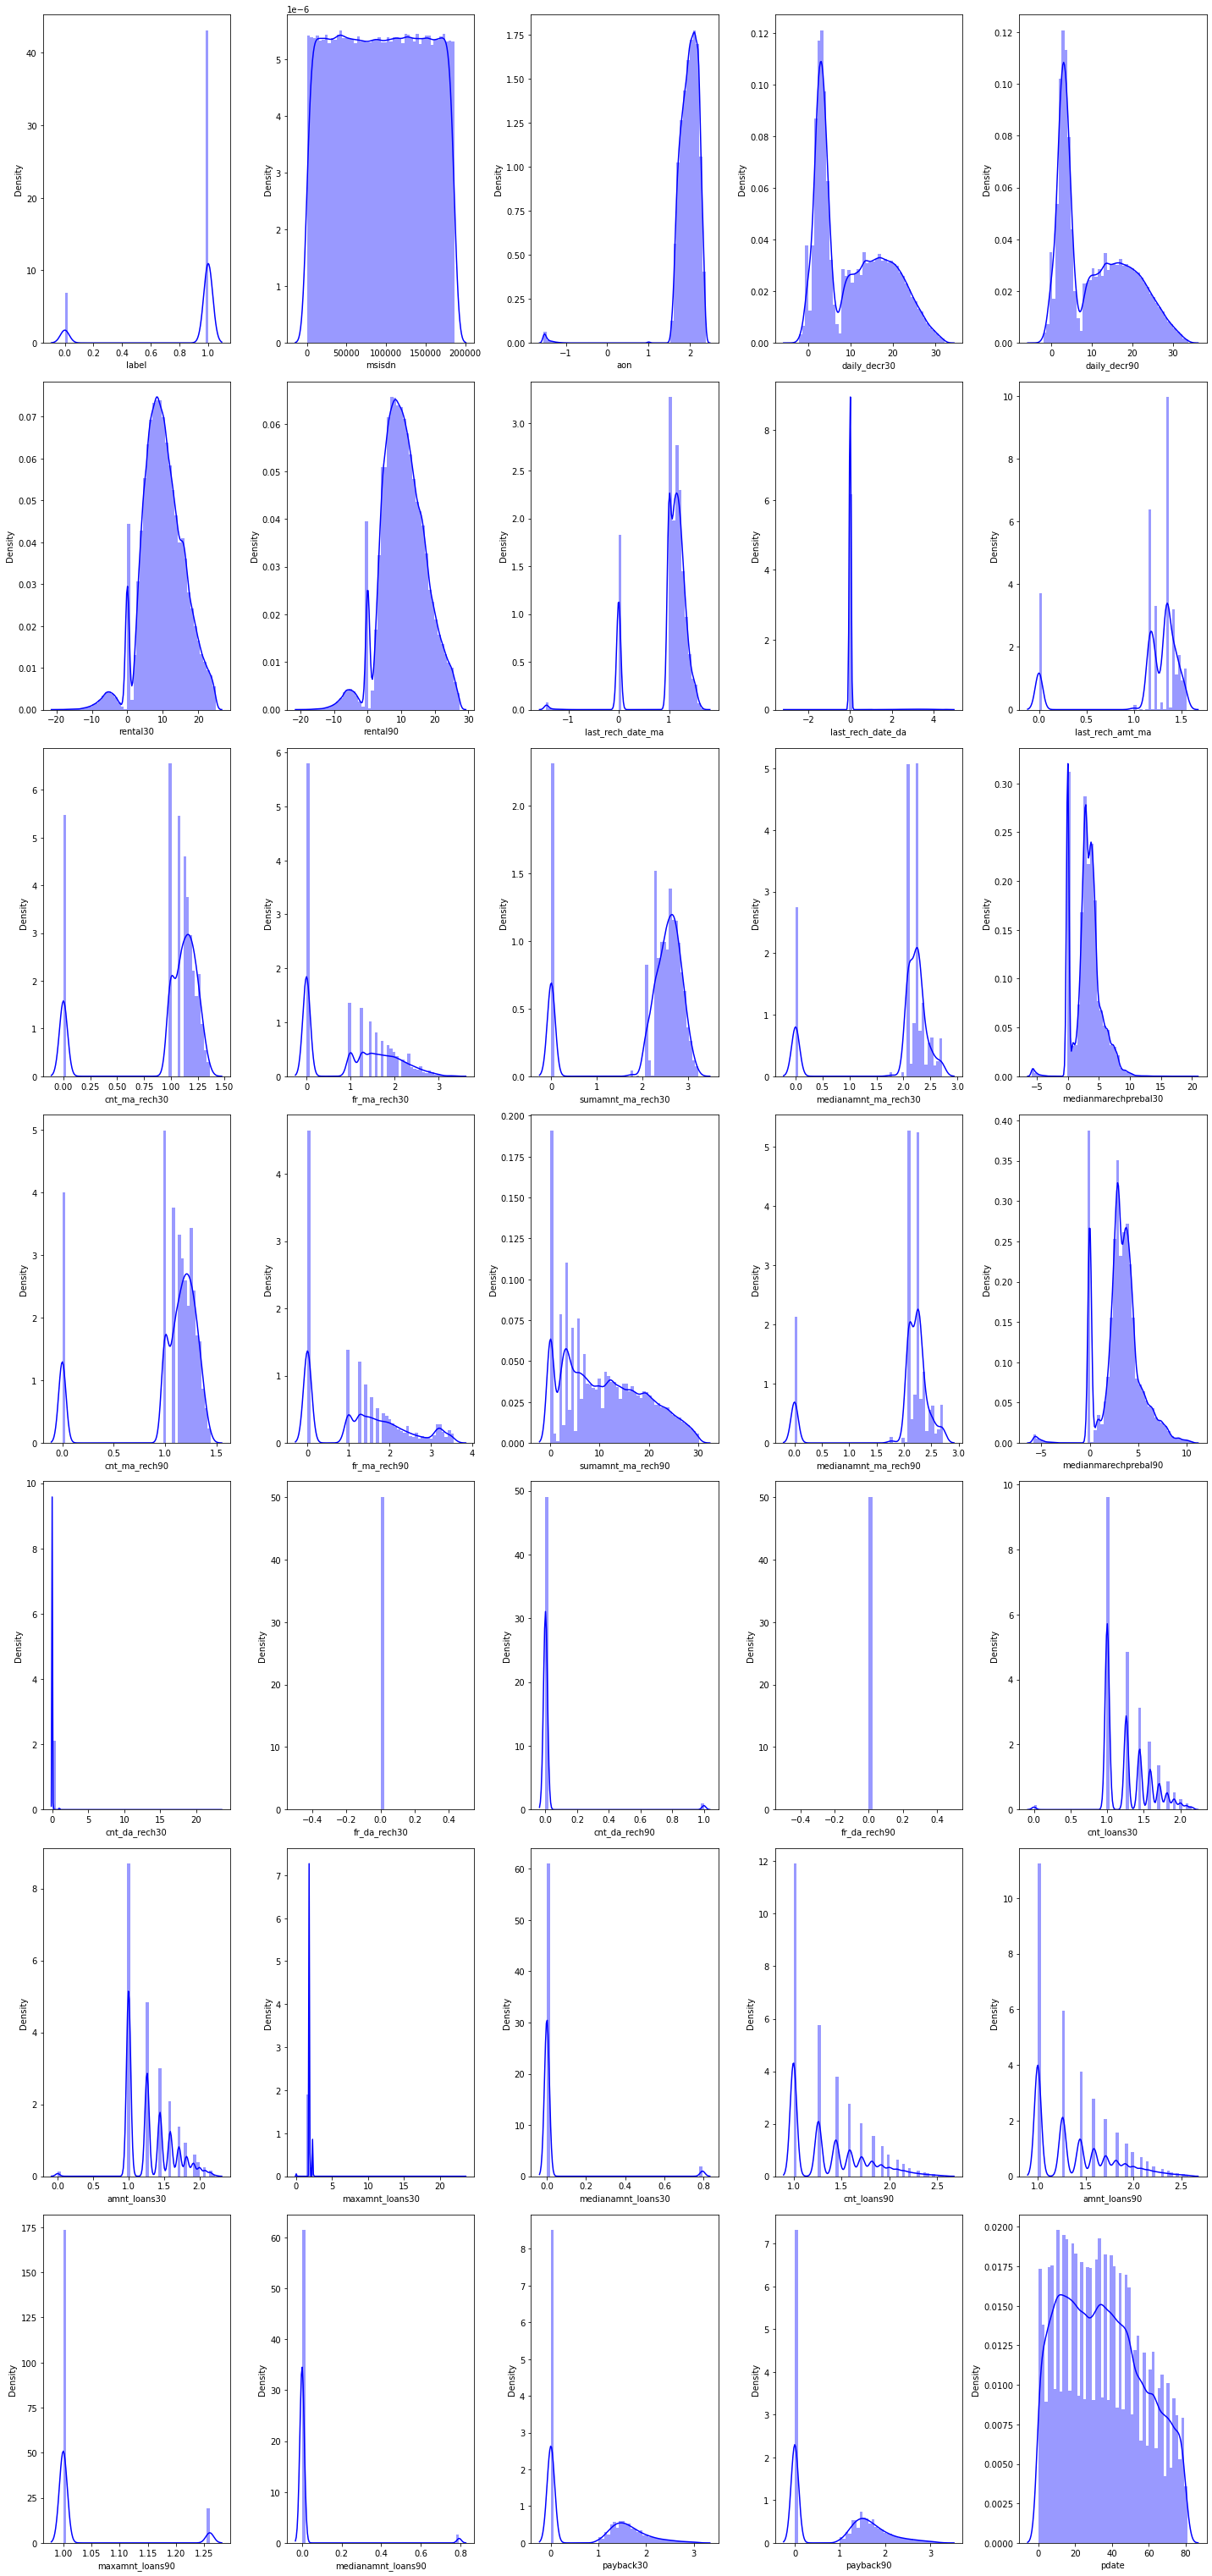

In [37]:
#Data Distribution after cleaning mydataset
plt.figure(figsize=(20,60))

for i, col in zip(range(len(df.columns)),df.columns):
    plt.subplot(10,5,i+1)
    sns.distplot(df[col], color='blue')
    plt.tight_layout()

1.0    139583
0.0     22442
Name: label, dtype: int64


<AxesSubplot:xlabel='label', ylabel='count'>

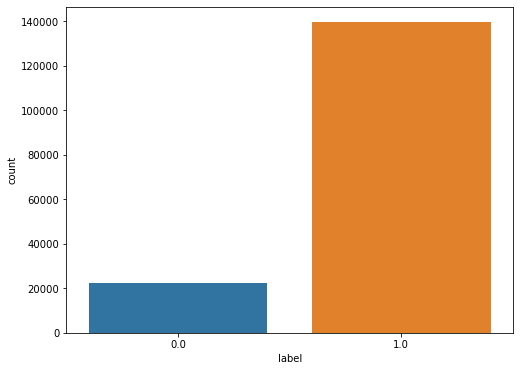

In [39]:
#Working on my label to handlance imbalance
plt.figure(figsize=(8,6))
print(df['label'].value_counts())
sns.countplot(df['label'].sort_values())

In [40]:
non_defaulter=df[df.label==1]
defaulter=df[df.label==0]

In [41]:
from sklearn.utils import resample

In [42]:
default_sample=resample(defaulter, n_samples=len(non_defaulter))

In [43]:
upsampled=pd.concat([non_defaulter,default_sample])

In [44]:
#Data is balanced now
upsampled.label.value_counts()

0.0    139583
1.0    139583
Name: label, dtype: int64

In [45]:
#Splitting my Label and features
xdata=upsampled.drop(columns=['label'])
xdata.head()

,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,...,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pdate
1,142291,2.074637,22.971610,22.973347,15.454616,15.454616,1.394951,0.0,1.498068,1.000000,...,1.259921,2.289428,0.0,1.000000,1.259921,1.259921,0.0,0.000000,0.000000,70
2,33594,2.009789,11.181560,11.181560,9.655359,9.655359,1.129831,0.0,1.340749,1.000000,...,1.000000,1.817121,0.0,1.000000,1.000000,1.000000,0.0,0.000000,0.000000,79
3,104157,1.839368,2.768873,2.768873,5.422267,5.422267,1.510769,0.0,1.291550,0.000000,...,1.259921,1.817121,0.0,1.259921,1.259921,1.000000,0.0,0.000000,0.000000,5
4,6910,2.141438,5.320595,5.320595,10.319359,10.319359,1.166529,0.0,1.416782,1.241366,...,1.912931,1.817121,0.0,1.912931,1.912931,1.000000,0.0,1.326352,1.326352,21
5,67908,2.023199,13.117984,13.125916,7.166939,7.243982,1.080060,0.0,1.340749,1.166529,...,1.442250,1.817121,0.0,1.442250,1.442250,1.000000,0.0,2.223980,2.027401,31


In [46]:
#Scaling my features
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [47]:
#Scaling my features
xdata=pd.DataFrame(columns=xdata.columns,
                   data=sc.fit_transform(xdata))

In [48]:
ydata=upsampled.label
ydata.head()

1    1.0
2    1.0
3    1.0
4    1.0
5    1.0
Name: label, dtype: float64

In [49]:
from sklearn.model_selection import train_test_split

In [50]:
#Splitting my data into test and train
xtrain,xtest,ytrain,ytest=train_test_split(xdata,ydata,test_size=.3,random_state=32,stratify=ydata)

# Classification Model Buiding

In [51]:
#Building my logsitic regression model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
logic_r = LogisticRegression() #Instantiate the LogisticRegression object
logic_r.fit(xtrain,ytrain) #Call the fit method of logistic regression to train the model or to learn the parameters of model
y_pred = logic_r.predict(xtest) #Predict  

In [52]:
#Metrics for my Logistic regression model
print('\033[1m''->'*63)
print('\033[1m''Confusion Matrix\n',confusion_matrix(ytest,y_pred)) #for confusion matrix
print('-'*40)
LR_accuracy = accuracy_score(ytest,y_pred)
print('Accuracy of Logistic Regression :{:.2f}'.format(LR_accuracy)) #for accuracy score
print('-'*40)
print('\n Classification Report\n',classification_report(ytest,y_pred)) #for classification report
print('->'*63)

->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->
Confusion Matrix
 [[33049  8826]
 [10036 31839]]
----------------------------------------
Accuracy of Logistic Regression :0.77
----------------------------------------

 Classification Report
               precision    recall  f1-score   support

         0.0       0.77      0.79      0.78     41875
         1.0       0.78      0.76      0.77     41875

    accuracy                           0.77     83750
   macro avg       0.78      0.77      0.77     83750
weighted avg       0.78      0.77      0.77     83750

->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->


In [53]:
#Building my DecisionTreeClassifier model
from sklearn.tree import DecisionTreeClassifier
DT = DecisionTreeClassifier() #Instantiate the DecisionTreeClassifier object
DT.fit(xtrain,ytrain) #Call the fit method of DecisionTreeClassifier to train the model or to learn the parameters of model
y_pred1 = DT.predict(xtest) #Predict  

In [54]:
#Metrics for my DecisionTreeClassifier model
print('\033[1m''->'*63)
print('\033[1m''Confusion Matrix\n',confusion_matrix(ytest,y_pred1)) #for confusion matrix
print('-'*40)
DT_accuracy = accuracy_score(ytest,y_pred1)
print('Accuracy of Decision Tree :{:.2f}'.format(DT_accuracy)) #for accuracy score
print('-'*40)
print('\n Classification Report\n',classification_report(ytest,y_pred1)) #for classification report
print('->'*63)

->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->
Confusion Matrix
 [[41665   210]
 [ 3540 38335]]
----------------------------------------
Accuracy of Decision Tree :0.96
----------------------------------------

 Classification Report
               precision    recall  f1-score   support

         0.0       0.92      0.99      0.96     41875
         1.0       0.99      0.92      0.95     41875

    accuracy                           0.96     83750
   macro avg       0.96      0.96      0.96     83750
weighted avg       0.96      0.96      0.96     83750

->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->


In [55]:
#Building my GaussianNB model
from sklearn.naive_bayes import GaussianNB
NB = GaussianNB() #Instantiate the GaussianNB object
NB.fit(xtrain,ytrain) #Call the fit method of GaussianNB to train the model or to learn the parameters of model
y_pred2 = NB.predict(xtest) #Predict  

In [56]:
#Metrics for my GaussianNB model
print('\033[1m''->'*63)
print('\033[1m''Confusion Matrix\n',confusion_matrix(ytest,y_pred2)) #for confusion matrix
print('-'*40)
NB_accuracy = accuracy_score(ytest,y_pred2)
print('Accuracy of GaussianNB :{:.2f}'.format(NB_accuracy)) #for accuracy score
print('-'*40)
print('\n Classification Report\n',classification_report(ytest,y_pred2)) #for classification report
print('->'*63)


->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->
Confusion Matrix
 [[31750 10125]
 [10477 31398]]
----------------------------------------
Accuracy of GaussianNB :0.75
----------------------------------------

 Classification Report
               precision    recall  f1-score   support

         0.0       0.75      0.76      0.76     41875
         1.0       0.76      0.75      0.75     41875

    accuracy                           0.75     83750
   macro avg       0.75      0.75      0.75     83750
weighted avg       0.75      0.75      0.75     83750

->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->


# Ensemble Approach

In [57]:
#Building my AdaBoostClassifier model
from sklearn.ensemble import AdaBoostClassifier
abc = AdaBoostClassifier() #Instantiate the AdaBoostClassifier object
abc.fit(xtrain,ytrain) #Call the fit method of AdaBoostClassifier to train the model or to learn the parameters of model
y_pred3 = abc.predict(xtest) #Predict  

In [58]:
#Metrics for my AdaBoostClassifier model
print('\033[1m''->'*63)
print('\033[1m''Confusion Matrix\n',confusion_matrix(ytest,y_pred3)) #for confusion matrix
print('-'*40)
abc_accuracy = accuracy_score(ytest,y_pred3)
print('Accuracy of AdaBoostClassifier :{:.2f}'.format(abc_accuracy)) #for accuracy score
print('-'*40)
print('\n Classification Report\n',classification_report(ytest,y_pred3)) #for classification report
print('->'*63)


->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->
Confusion Matrix
 [[35669  6206]
 [ 7290 34585]]
----------------------------------------
Accuracy of AdaBoostClassifier :0.84
----------------------------------------

 Classification Report
               precision    recall  f1-score   support

         0.0       0.83      0.85      0.84     41875
         1.0       0.85      0.83      0.84     41875

    accuracy                           0.84     83750
   macro avg       0.84      0.84      0.84     83750
weighted avg       0.84      0.84      0.84     83750

->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->


In [59]:
#Building my  GradientBoostingClassifier model
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier() #Instantiate the GradientBoostingClassifier object
gbc.fit(xtrain,ytrain) #Call the fit method of GradientBoostingClassifier to train the model or to learn the parameters of model
y_pred4 = gbc.predict(xtest) #Predict  

In [60]:
#Metrics for my GradientBoostingClassifier model
print('\033[1m''->'*63)
print('\033[1m''Confusion Matrix\n',confusion_matrix(ytest,y_pred4)) #for confusion matrix
print('-'*40)
gbc_accuracy = accuracy_score(ytest,y_pred4)
print('Accuracy of GradientBoostingClassifier :{:.2f}'.format(gbc_accuracy)) #for accuracy score
print('-'*40)
print('\n Classification Report\n',classification_report(ytest,y_pred4)) #for classification report
print('->'*63)


->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->
Confusion Matrix
 [[35804  6071]
 [ 6255 35620]]
----------------------------------------
Accuracy of GradientBoostingClassifier :0.85
----------------------------------------

 Classification Report
               precision    recall  f1-score   support

         0.0       0.85      0.86      0.85     41875
         1.0       0.85      0.85      0.85     41875

    accuracy                           0.85     83750
   macro avg       0.85      0.85      0.85     83750
weighted avg       0.85      0.85      0.85     83750

->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->


In [61]:
#Building my BaggingClassifier model
from sklearn.ensemble import BaggingClassifier
bc = BaggingClassifier() #Instantiate the BaggingClassifier object
bc.fit(xtrain,ytrain) #Call the fit method of BaggingClassifier to train the model or to learn the parameters of model
y_pred5 = bc.predict(xtest) #Predict  

In [62]:
#Metrics for my BaggingClassifier model
print('\033[1m''->'*63)
print('\033[1m''Confusion Matrix\n',confusion_matrix(ytest,y_pred5)) #for confusion matrix
print('-'*40)
bc_accuracy = accuracy_score(ytest,y_pred5)
print('Accuracy of BaggingClassifier :{:.2f}'.format(bc_accuracy)) #for accuracy score
print('-'*40)
print('\n Classification Report\n',classification_report(ytest,y_pred5)) #for classification report
print('->'*63)


->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->
Confusion Matrix
 [[41667   208]
 [ 3266 38609]]
----------------------------------------
Accuracy of BaggingClassifier :0.96
----------------------------------------

 Classification Report
               precision    recall  f1-score   support

         0.0       0.93      1.00      0.96     41875
         1.0       0.99      0.92      0.96     41875

    accuracy                           0.96     83750
   macro avg       0.96      0.96      0.96     83750
weighted avg       0.96      0.96      0.96     83750

->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->


In [63]:
#Building my ExtraTreesClassifier model
from sklearn.ensemble import ExtraTreesClassifier
etc = ExtraTreesClassifier() #Instantiate the ExtraTreesClassifier object
etc.fit(xtrain,ytrain) #Call the fit method of ExtraTreesClassifier to train the model or to learn the parameters of model
y_pred6 = etc.predict(xtest) #Predict  

In [64]:
#Metrics for my ExtraTreesClassifier model
print('\033[1m''->'*63)
print('\033[1m''Confusion Matrix\n',confusion_matrix(ytest,y_pred6)) #for confusion matrix
print('-'*40)
etc_accuracy = accuracy_score(ytest,y_pred6)
print('Accuracy of ExtraTreesClassifier :{:.2f}'.format(etc_accuracy)) #for accuracy score
print('-'*40)
print('\n Classification Report\n',classification_report(ytest,y_pred6)) #for classification report
print('->'*63)


->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->
Confusion Matrix
 [[41645   230]
 [ 1294 40581]]
----------------------------------------
Accuracy of ExtraTreesClassifier :0.98
----------------------------------------

 Classification Report
               precision    recall  f1-score   support

         0.0       0.97      0.99      0.98     41875
         1.0       0.99      0.97      0.98     41875

    accuracy                           0.98     83750
   macro avg       0.98      0.98      0.98     83750
weighted avg       0.98      0.98      0.98     83750

->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->


In [65]:
#Building my RandomForestClassifier model
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier() #Instantiate the RandomForestClassifier object
rf.fit(xtrain,ytrain) #Call the fit method of RandomForestClassifier to train the model or to learn the parameters of model
y_pred7 = rf.predict(xtest) #Predict  

In [66]:
#Metrics for my RandomForestClassifier model
print('\033[1m''->'*63)
print('\033[1m''Confusion Matrix\n',confusion_matrix(ytest,y_pred7)) #for confusion matrix
print('-'*40)
rf_accuracy = accuracy_score(ytest,y_pred7)
print('Accuracy of RandomForestClassifier :{:.2f}'.format(rf_accuracy)) #for accuracy score
print('-'*40)
print('\n Classification Report\n',classification_report(ytest,y_pred7)) #for classification report
print('->'*63)


->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->
Confusion Matrix
 [[41694   181]
 [ 1996 39879]]
----------------------------------------
Accuracy of RandomForestClassifier :0.97
----------------------------------------

 Classification Report
               precision    recall  f1-score   support

         0.0       0.95      1.00      0.97     41875
         1.0       1.00      0.95      0.97     41875

    accuracy                           0.97     83750
   macro avg       0.97      0.97      0.97     83750
weighted avg       0.97      0.97      0.97     83750

->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->


# Inferences
Below are the model accuracies which imlemented above without any hyper parameter, We will see now for which model should we be doing hyper Parameter before that we would do cross validation for all the models build. 

Model Name	               Variable 	Accuracy

LogisticRegression	       logic_r	    0.77

DecisionTreeClassifier     DT	        0.95

GaussianNB	               NB	        0.75

AdaBoostClassifier	       abc	        0.80

GradientBoostingClassifier gbc	        0.83

BaggingClassifier          bc	        0.96

ExtraTreesClassifier	   etc	        0.98


RandomForestClassifier	   rf	        0.98



In [67]:
#for cross Validation
from sklearn.model_selection import KFold,cross_val_score

#Cross Validation  for Linear regression
a =cross_val_score(logic_r,xdata,ydata,cv=5).mean()
b = LR_accuracy

b-a

-0.00040544135581011

In [68]:
#for cross Validation
from sklearn.model_selection import KFold,cross_val_score

#Cross Validation  for Decision Tree
a =cross_val_score(DT,xdata,ydata,cv=5).mean()
b = DT_accuracy

b-a

-0.0031628868909144847

In [69]:
#for cross Validation
from sklearn.model_selection import KFold,cross_val_score

#Cross Validation  for GaussianNB
a =cross_val_score(NB,xdata,ydata,cv=5).mean()
b = NB_accuracy

b-a

0.0005761112121011047

In [70]:
#for cross Validation
from sklearn.model_selection import KFold,cross_val_score

#Cross Validation  for AdaBoostClassifier
a =cross_val_score(abc,xdata,ydata,cv=5).mean()
b = abc_accuracy

b-a

-0.00015245258158891328

In [72]:
#for cross Validation
from sklearn.model_selection import KFold,cross_val_score

#Cross Validation  for GradientBoostingClassifier
a =cross_val_score(gbc,xdata,ydata,cv=5).mean()
b = gbc_accuracy

b-a

-0.00034233256282045765

In [73]:
#for cross Validation
from sklearn.model_selection import KFold,cross_val_score

#Cross Validation  for BaggingClassifier
a =cross_val_score(bc,xdata,ydata,cv=5).mean()
b = bc_accuracy

b-a

-0.004824988205521574

In [74]:
#for cross Validation
from sklearn.model_selection import KFold,cross_val_score

#Cross Validation  for ExtraTreesClassifier
a =cross_val_score(etc,xdata,ydata,cv=5).mean()
b = etc_accuracy

b-a

-0.0027187698275820127

In [75]:
#for cross Validation
from sklearn.model_selection import KFold,cross_val_score

#Cross Validation  for RandomForestClassifier
a =cross_val_score(rf,xdata,ydata,cv=5).mean()
b = rf_accuracy

b-a

-0.002896661861900518

# Inferences

Based on the above cross validation and the model accuracy i see random forest is leading for the model performance lets try hyper parameter tuning for the same and try to increase model performance from 98%

In [76]:
from sklearn.model_selection import GridSearchCV

param_grid = {  'bootstrap': [True], 'max_depth': [5, 10, None], 'max_features': ['auto', 'log2'], 'n_estimators': [5, 6, 7, 8, 9, 10, 11, 12, 13, 15]}

In [77]:
g_search = GridSearchCV(estimator = rf, param_grid = param_grid, 

                          cv = 3, n_jobs = 1, verbose = 0, return_train_score=True)

In [78]:
g_search.fit(xtrain,ytrain)

GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=1,
             param_grid={'bootstrap': [True], 'max_depth': [5, 10, None],
                         'max_features': ['auto', 'log2'],
                         'n_estimators': [5, 6, 7, 8, 9, 10, 11, 12, 13, 15]},
             return_train_score=True)

In [79]:
print(g_search.best_params_)

{'bootstrap': True, 'max_depth': None, 'max_features': 'log2', 'n_estimators': 15}


In [80]:
#Building my RandomForestClassifier model with bes param chosen from hyper parameter using GridSearchCV
from sklearn.ensemble import RandomForestClassifier
rf1 = RandomForestClassifier(bootstrap=True,max_depth=None,max_features='log2',n_estimators=15) #Instantiate the RandomForestClassifier object
rf1.fit(xtrain,ytrain) #Call the fit method of RandomForestClassifier to train the model or to learn the parameters of model
y_pred8 = rf1.predict(xtest) #Predict  

In [81]:
#Metrics for my RandomForestClassifier model
print('\033[1m''->'*63)
print('\033[1m''Confusion Matrix\n',confusion_matrix(ytest,y_pred8)) #for confusion matrix
print('-'*40)
rf1_accuracy = accuracy_score(ytest,y_pred8)
print('Accuracy of RandomForestClassifier :{:.2f}'.format(rf1_accuracy)) #for accuracy score
print('-'*40)
print('\n Classification Report\n',classification_report(ytest,y_pred8)) #for classification report
print('->'*63)


->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->
Confusion Matrix
 [[41651   224]
 [ 2192 39683]]
----------------------------------------
Accuracy of RandomForestClassifier :0.97
----------------------------------------

 Classification Report
               precision    recall  f1-score   support

         0.0       0.95      0.99      0.97     41875
         1.0       0.99      0.95      0.97     41875

    accuracy                           0.97     83750
   macro avg       0.97      0.97      0.97     83750
weighted avg       0.97      0.97      0.97     83750

->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->


# Conclusion 

By Using Hyperparameter i get less accuracy so i have chosen for the defautl random forest model as best and the same has been saved as pkl

In [82]:
#Saving the model in pkl file
import joblib
joblib.dump(rf,"micro_credit_loan.pkl")

model = joblib.load("micro_credit_loan.pkl")

#Predicting the saved model
prediction = model.predict(xtest)

#Converting the result into DataFrame
prediction = pd.DataFrame(prediction)

#Saving the result into CSV
prediction.to_csv("micro_credit_loan.csv",index=False)

